<div style="background-color: #4CAF50; color: white; padding: 15px; border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
  <h2>Malaria Detection</h2>
</div>

<div style="text-align: center; color: #A5D6A7; font-size: 18px; margin-top: 10px;">
  <h4>Data Preprocessing</h4>
</div>

<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h4 style="text-align: left; color: #81C784;">Problem Understanding</h4>
  <p><strong>Objective:</strong> Detect malaria by classifying cell images as <em>infected</em> or <em>uninfected</em>.</p>
  <ul>
    <li><strong>Data:</strong> Use a publicly available dataset such as the <strong>Malaria Cell Images Dataset</strong>.</li>
    <li>Dataset provided by the <strong><a href=" https://ceb.nlm.nih.gov/repositories/malaria-datasets/">National Institute of Health (NIH)</a></strong>.</li>
  </ul>
</div>


<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-size: 16px; line-height: 1.6;">
  <h3 style="color: #4CAF50; font-family: Arial, sans-serif;">Data Preparation: Malaria Images Dataset</h3>
  
  <h4 style="color: #A5D6A7;">Step 1: Collect Data</h4>
  <p>
    The Malaria Images Dataset is publicly available on Kaggle for faster access. It is widely used for training machine learning models to detect malaria in cell images.
    The dataset is structured into two primary folders:
  </p>
  <ul style="margin-left: 20px;">
    <li><strong>Parasitized</strong>: Contains images of infected cells.</li>
    <li><strong>Uninfected</strong>: Contains images of healthy cells.</li>
  </ul>
  
  <h4 style="color: #A5D6A7;">Why Kaggle?</h4>
  <p>
    While the dataset is originally hosted by the National Institute of Health (NIH), downloading it from Kaggle offers faster speeds and easier access.
  </p>
  
  <p>We will:</p>
  <ul style="margin-left: 20px;">
    <li>Download the dataset directly from Kaggle using the <code>!kaggle datasets download</code> command.</li>
    <li>Organize the dataset into a working directory for preprocessing.</li>
    <li>Understand the dataset structure and preview the images before further steps.</li>
  </ul>
</div>



In [2]:
# Uncomment below line and run the cell
#%pip install kaggle

In [3]:
# Download the dataset from Kaggle
print("Downloading the dataset from Kaggle...")

!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p '../data'

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 62%|█████████████████████████▎               | 417M/675M [13:28<07:39, 589kB/s]

<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-size: 16px; line-height: 1.6;">
  <h3 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: left;">Extract: cell-images-for-detecting-malaria.zip</h3>
  
  <p>
    After downloading the Malaria Images Dataset, the next step is to extract the contents into a specified directory. 
    The dataset is organized into two main folders:
  </p>
  <ul style="margin-left: 20px;">
    <li><strong>Parasitized</strong>: Contains images of cells infected with malaria parasites.</li>
    <li><strong>Uninfected</strong>: Contains images of healthy, malaria-free cells.</li>
  </ul>
  <p>
    Use the code below to extract the dataset into the working directory and ensure it is ready for preprocessing:
  </p>
</div>


In [ ]:
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from data_preprocessing import Preprocessor

# Create instance of Preprocessor
processor = Preprocessor('../data')
# Call the function
cell_images = processor.load_data('../data/cell-images-for-detecting-malaria.zip') 


Extracting the dataset from '../data/cell-images-for-detecting-malaria.zip' to '../data'...
Dataset extracted successfully!

Extracted Folder Structure:
data/
    cell_images/
        cell_images/
            Parasitized/
            Uninfected/
        Parasitized/
        Uninfected/


<div style="background-color: #4CAF50; color: white; padding: 15px; border-radius: 8px; font-family: Arial, sans-serif;">
  <h2 style="text-align: center; font-size: 28px; margin-bottom: 10px;">Malaria Detection - Data Preprocessing</h2>
  <p style="font-size: 16px; line-height: 1.6; margin: 0;">
    In this step, we preprocess the <strong>Malaria Detection Dataset</strong> to prepare it for training a deep learning model.
    The dataset contains labeled images of infected (<em>Parasitized</em>) and uninfected cells. 
    The steps include:
  </p>
  <ul style="font-size: 16px; line-height: 1.6; margin: 10px 0 0 20px;">
    <li>Loading and resizing the images to a uniform size of <code>128x128</code>.</li>
    <li>Normalizing pixel values to the range [0, 1].</li>
    <li>Checking class balance to understand the dataset distribution.</li>
    <li>Splitting the data into training, validation, and test sets.</li>
    <li>Applying data augmentation for better model generalization.</li>
  </ul>
</div>


Loading and resizing images...
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/Thumbs.db
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/Thumbs.db
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized
Normalizing images...
Checking class balance...
Parasitized: 13779
Uninfected: 13779
Splitting data into training, validation, and test sets...
Creating data augmentation generator...


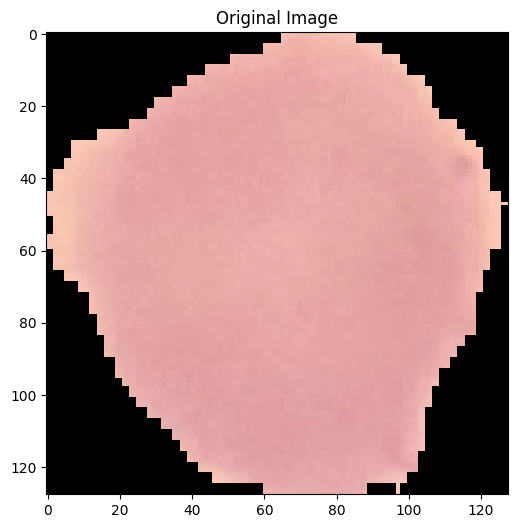

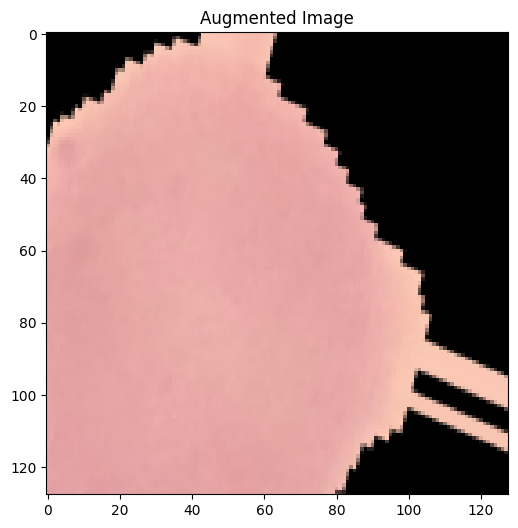

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Path to dataset
dataset_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'

# Step 1: Load and Resize Images
images, labels = processor.resize_images(dataset_path)

# Step 2: Normalize Images
images = processor.normalize_images(images)

# Step 3: Check Class Balance
class_counts = processor.check_class_balance(labels)

# Step 4: Split Data
train_images, val_images, test_images, train_labels, val_labels, test_labels = processor.split_data(images, labels)

# Step 5: Data Augmentation
data_generator = processor.augment_data()

# Display an Example Augmented Image
example_image = train_images[0]
plt.figure(figsize=(6, 6))
plt.imshow(example_image / np.max(example_image))  # Rescale for display
plt.title("Original Image")

augmented_example = next(data_generator.flow(np.expand_dims(example_image, 0)))[0]
plt.figure(figsize=(6, 6))
plt.imshow(augmented_example / np.max(augmented_example))  # Rescale for display
plt.title("Augmented Image")
plt.show()
